### Assignment 16: Linear Regression

##### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

##### Load the dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
target = boston.target

##### About the dataset

In [3]:
print('No. of records:', data.shape[0])
print('No. of features:', data.shape[1])

No. of records: 506
No. of features: 13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print('Feature Names:')
boston.feature_names

Feature Names:


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print('Description of the dataset:')
boston.DESCR

Description of the dataset:


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

##### Scaling the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
data = scaler.fit_transform(data)

##### Splitting the dataset for train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data
y = target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

##### Model Generation and Fitting

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Score of the Model:')
model.score(X_train, y_train)

Score of the Model:


0.7387038327766107

In [18]:
print('Coefficients of the Model:')
model.coef_

Coefficients of the Model:


array([-0.98360797,  1.12070941, -0.20100406,  0.59161044, -2.0285784 ,
        2.60830624,  0.23821426, -3.22634186,  2.63679418, -1.93478718,
       -1.94124598,  0.84211265, -3.78813091])

In [19]:
print('Intercept of the Model:')
model.intercept_

Intercept of the Model:


22.44693712875273

##### Performance Evaluation of the Model

In [20]:
from sklearn.metrics import r2_score

In [21]:
# Predicting using test dataset
y_pred = model.predict(X_test)

In [22]:
print('R_Squared:')
r2_score(y_test, y_pred)

R_Squared:


0.741393559799985

In [23]:
##### Predicting for an unseen record

In [24]:
print('House Price predicted by the Model:')
model.predict([[0.13262, 0.00000, 8.56000, 0.00000, 0.52000, 5.85100, 96.70000, 2.10690, 5.00000, 384.00000, 20.90000, 394.05000, 16.47000]])

House Price predicted by the Model:


array([-449.86239852])

##### Visualizing the actual and predicted values of test dataset

In [25]:
import seaborn as sb

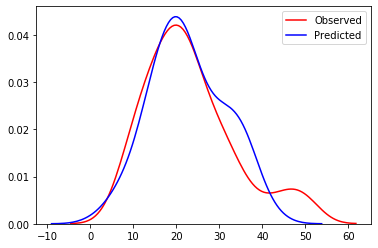

In [26]:
ax1 = sb.distplot(y_test, hist=False, color="r", label="Observed")
sb.distplot(y_pred, hist=False, color="b", label="Predicted" , ax=ax1)